<a href="https://colab.research.google.com/github/heryca-gomes/AGENDA/blob/main/Projeto_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Doenças cardíacas consistem na ocorrência de falhas nas estruturas do coração, de modo que estas passem a não funcionar corretamente, podendo possuir agravantes diretamente ligados ao estilo de vida do paciente. Dentre eles podemos citar, a título de exemplo, comportamentos como: tabagismo, estresse, má alimentação e sedentarismo.

Nesse contexto, doenças cardiovasculares se apresentam globalmente como a principal causa de morte, segundo aponta a OMS. Como exemplo de doenças cardiovasculares, podemos citar: arritimia, artrose, cardiomiopatia, endocartite, estenose mitral, hipertensção, infarto entre outros. Tendo em vista que, como apontado anteriormente, doenças do coração estão, muitas vezes, diretamente ligadas a hábitos, de modo que a partir disso é possível perceber padrões comportamentais dentro de determinados grupos, podendo ainda ser observados aspectos como a relação entre a ocorrência das comorbidades e idade, sexo, pressão arterial e outros.

Haja visto as constatações apresentadas até aqui, essa análise se propõe a identificar padrões de ocorrência em pacientes que apresentam algum tipo de doença cardíaca, desta forma podemos entender quais os perfis de pessoas que tendem a ter doenças cardiovasculares e quais tendem a não ter.

In [1]:
#instalando lib
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=db57cb25cade1d3b66019431cc6f64cba0bd81ebdb2233fa4a27cd2c938a3297
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split  # Para dividir os dados em treino e teste
from sklearn.preprocessing import StandardScaler  # Para normalizar os dados
from sklearn.neighbors import KNeighborsClassifier  # Modelo KNN
from sklearn.tree import DecisionTreeClassifier  # Modelo Árvore de Decisão
from sklearn.ensemble import RandomForestClassifier  # Modelo Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Métricas de avaliação

In [3]:
# Fazendo a leitura dos dados
df = files.upload()
df = pd.read_csv('heart.csv')

#Atribuindo nomes mais intuitivos para as colunas, afim de facilitar a leitura dos dados
df.columns = [
    'idade',
    'sexo',
    'tipo de dor no peito',
    'pressão arterial em repouso',
    'colesterol',
    'glicemia em jejum',
    'Resultados eletrocardiográficos de repouso',
    'frequência cardíaca máxima alcançada',
    'angina induzida por exercício',
    'oldpeak ',
    'inclinação',
    'número de vasos principais',
    'thal',
    'alvo'
]

Saving heart.csv to heart.csv


In [4]:
#exibindo informações sobre o dataset
print(df.shape)
print(df.head)
print(df.describe())

(1025, 14)
<bound method NDFrame.head of       idade  sexo  tipo de dor no peito  pressão arterial em repouso  \
0        52     1                     0                          125   
1        53     1                     0                          140   
2        70     1                     0                          145   
3        61     1                     0                          148   
4        62     0                     0                          138   
...     ...   ...                   ...                          ...   
1020     59     1                     1                          140   
1021     60     1                     0                          125   
1022     47     1                     0                          110   
1023     50     0                     0                          110   
1024     54     1                     0                          120   

      colesterol  glicemia em jejum  \
0            212                  0   
1            203

In [5]:
#tratanto valores ausentes
df.isnull().sum()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   idade                                       1025 non-null   int64  
 1   sexo                                        1025 non-null   int64  
 2   tipo de dor no peito                        1025 non-null   int64  
 3   pressão arterial em repouso                 1025 non-null   int64  
 4   colesterol                                  1025 non-null   int64  
 5   glicemia em jejum                           1025 non-null   int64  
 6   Resultados eletrocardiográficos de repouso  1025 non-null   int64  
 7   frequência cardíaca máxima alcançada        1025 non-null   int64  
 8   angina induzida por exercício               1025 non-null   int64  
 9   oldpeak                                     1025 non-null   float64
 10  inclinação  

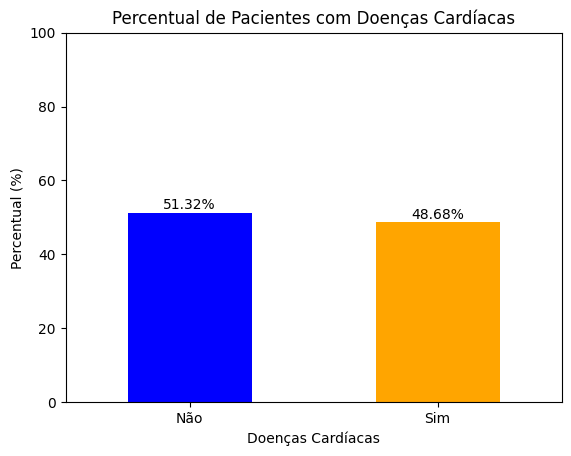

In [45]:
#analise exploratória
#Qual o percentual de pacientes com doenças cardíacas?
pacientesDoentes = df['alvo'].value_counts(normalize=True) * 100
pacientesDoentes

# Mapeando os índices para "Sim" e "Não"
pacientesDoentes.index = ['Não', 'Sim']

# Criar gráfico de barras
pacientesDoentes.plot(kind='bar', color=['blue', 'orange'])
plt.title('Percentual de Pacientes com Doenças Cardíacas')
plt.xlabel('Doenças Cardíacas')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)

# Exibir valores acima das barras
for i, v in enumerate(pacientesDoentes):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.show()


Idade mínima: 29
Idade máxima: 77
Idade média: 54.43414634146342


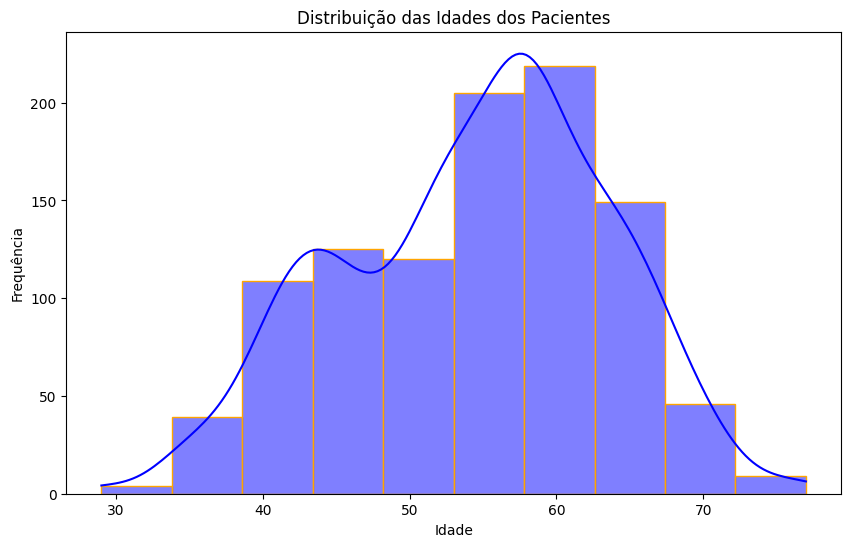

In [49]:
#análise exploratoria
#qual a faixa etária dos pacientes?

min_idade = df['idade'].min()
max_idade = df['idade'].max()
media_idade = df['idade'].mean()

print(f"Idade mínima: {min_idade}")
print(f"Idade máxima: {max_idade}")
print(f"Idade média: {media_idade}")

# Histograma para visualizar a distribuição das idades
plt.figure(figsize=(10, 6))
sns.histplot(df['idade'], bins=10, kde=True, color='blue', edgecolor='orange')
plt.title("Distribuição das Idades dos Pacientes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

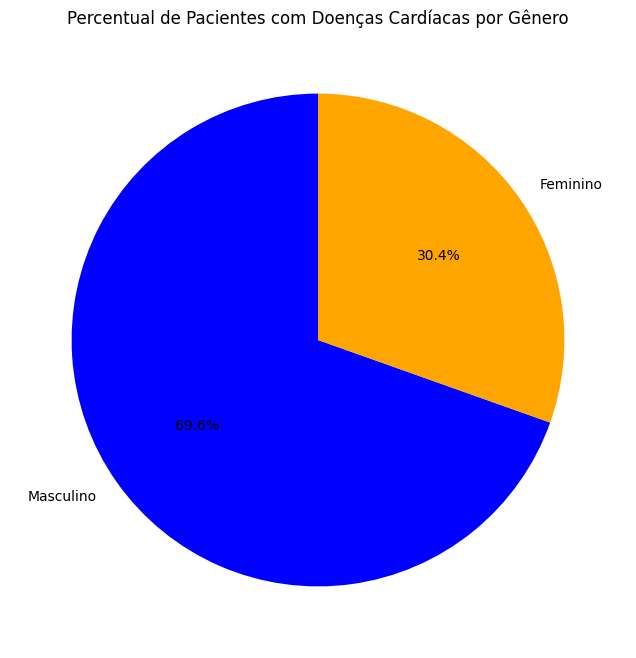

In [44]:
#análise exploratoria
#O gênero influencia na ocorrência de doenças cardíacas?
# Filtrar os pacientes com doenças cardíacas (alvo = 1)
data = df[df['alvo'] == 1]

# Contar o número de pacientes com doenças cardíacas por gênero
gender_counts = df['sexo'].value_counts()

# Mapear valores de 'sexo' para rótulos (0 = Feminino, 1 = Masculino)
labels = ['Masculino', 'Feminino']

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90,  colors=['blue', 'orange'])
plt.title("Percentual de Pacientes com Doenças Cardíacas por Gênero")
plt.show()

In [28]:
#separando features e labels
X = df.drop('alvo', axis=1)
y = df['alvo']

# Dividir em treino e teste (80% para treino e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#padronizando os dados
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [13]:
# o modelo knn, obtém resultados a partir da análise dos dados, assumindo que objetos semelhantes estarão próximos uns dos outros a partir de suas características
#treinando o modelo knn
knn = KNeighborsClassifier()
knn.fit(X_train_normalized, y_train)

acuracia = knn.score(X_train_normalized, y_train)
print(f"Acurácia do modelo: {acuracia:.2f}")


Acurácia do modelo: 0.95


In [14]:
#o modelo de árvore de decisão funciona dcomo um conjuto de regras hierarquicas. Em um árvore de decisões, as decisões se dão a partir de nós e a saídas por meio de folhas
#Assim, funcionando de maneira análoga a um fluxograma onde as resposta influenciam diretamente na saída
#treinando o modelo árvore de decisão
ad = DecisionTreeClassifier(random_state=42)
ad_modelo = ad.fit(X_train, y_train)

#verificando a acurácia
acuracia = ad.score(X_train, y_train)
print(f"Acurácia do modelo: {acuracia * 100:.2f}%")

Acurácia do modelo: 100.00%


In [15]:
#treinando o modelo randon forest

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo no conjunto de teste
y_pred_rf= rf.predict(X_test)
acuracia = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do modelo: {acuracia * 100:.2f}%")


Acurácia do modelo: 98.54%


**Explique qual modelo apresentou os melhores resultados e justifique por que você o considera o mais adequado para resolver o problema.**

R: O modelo Árvore de Decisão se adequou bem com o conjunto de dados e teve os melhores resultados, alcançando uma acurácia de 100%, o que indica que classificou muito bem aos casos no conjunto de testes. Além disso, o modelo é facil de compreender, já que consigo ver o processo de decisão e entender como cada variável afeta o resultado. Esse modelo se ajusta melhor ainda no conjunto por todas as variaveis serem numericas, permitindo que ele identifique padrões sem precisar de ajustes complexos. Portando, na minha opinião, a Arvore de Decisões foi a melhor escolha.